<a href="https://colab.research.google.com/github/MateoRivera/network-dynamics/blob/main/H1/Punto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2
There are a set of people $\left\{ a_{1},a_{2},a_{3},a_{4} \right\}$ and a set of foods $\left\{ b_{1},b_{2},b_{3},b_{4} \right\}$. Each person is interested in a subset of foods, specifically $$a_{1} \to \left\{b_{1},b_{2}\right\}, a_{2} \to \left\{b_{2},b_{3}\right\}, a_{3} \to \left\{b_{1},b_{4}\right\}, a_{4} \to \left\{b_{1},b_{2},b_{4}\right\}$$

## Libraries

In [11]:
# Handle graphs
import networkx as nx

# Graph visualization
import matplotlib.pyplot as plt

# Matrices operation and deep copy
import copy
import numpy as np
%matplotlib inline

## Point a
Exploit max-flow problems to find a perfect match (if any).

**Solution**

In this case, we have a bipartite graph $G=\left( V=V_{0} ⋃ V_{1}, E\right)$, where $V_{0}=\left\{ a_{i}\right\}^{4}_{i=1}$, $V_{1}=\left\{ b_{i}\right\}^{4}_{i=1}$, $E_{1}=\left\{ \left( a_{1}, b_{1} \right), \left( a_{1}, b_{2} \right), \left( a_{2}, b_{2} \right), \left( a_{2}, b_{3} \right), \left( a_{3}, b_{1} \right), \left( a_{3}, b_{4} \right), \left( a_{4}, b_{1} \right), \left( a_{4}, b_{2} \right), \left( a_{4}, b_{4} \right) \right\}$, $E_{2}=\left\{ \left ( j,i \right ):\left ( i,j \right ) \in E_{1} \right\}$, $E=E_{1}⋃E_{2}$

<div>
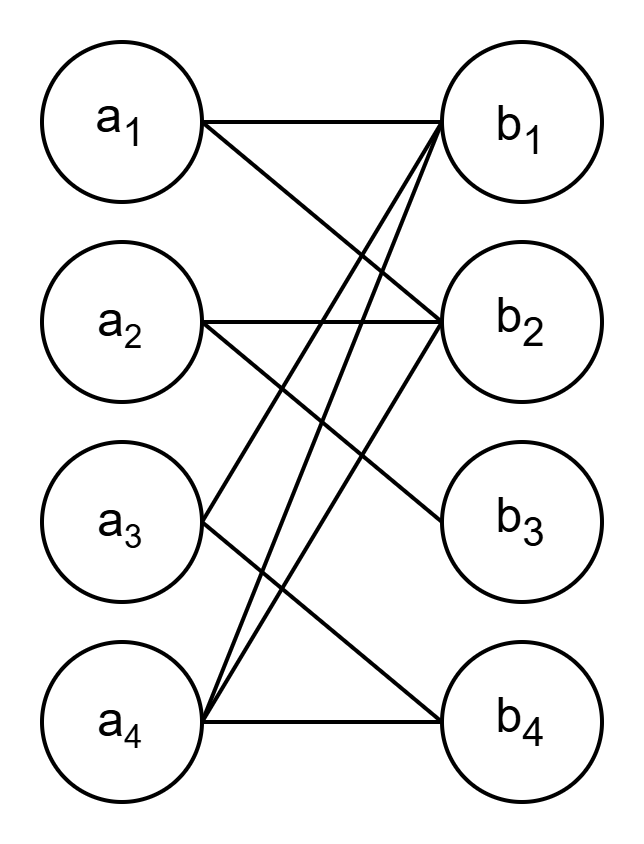
</div>

Let us consider the following capacitated directed multigraph $G_{a}=\left( V_{a}=\left\{ o \right\} ⋃ V ⋃ \left\{ d \right\}, E_{a}= \left\{ \left( o,i \right):i ∈ V_{0} \right\} ⋃ E_{1} ⋃ \left\{ \left( i,d \right):i ∈ V_{1} \right\}, \mathbf{c} \right)$ where $\mathbf{c} \in \mathbb{R}^{E_{a}} $, $c_{e}=\left\{\begin{matrix}
1 & if & e \in E_{a}\setminus E_{1} \\
\left| V_{0} \right| +1 = 5 & if & e \in E_{1} \\
\end{matrix}\right.$

In [12]:
# G = (V = V0 U V1, E = E1 U E2)
V0 = [f'a{i}' for i in range(1, 4 + 1)]
V1 = [f'b{i}' for i in range(1, 4 + 1)]
V = V0 + V1
E1 = [('a1', 'b1'), ('a1', 'b2'), ('a2', 'b2'), ('a2', 'b3'), ('a3', 'b1'), ('a3', 'b4'), ('a4', 'b1'), ('a4', 'b2'), ('a4', 'b4')]
E2 = copy.deepcopy(E1)
E2.reverse()
E = E1 + E2

cardinality_V0 = len(V0)
cardinality_V1 = len(V1)

# G_a = (V_a = {0} U V U {d}, E_a = {(o, j)| j \in V0} U E1 U {(i, d)| i \in V1})
V_a = ['o'] + V + ['d']
E_a = [("o", f"a{i}") for i in range(1, 4 + 1)] + E1 + [(f'b{i}', 'd') for i in range(1, 4 + 1)]

n_nodes_G_bar = 1 +  cardinality_V0 + cardinality_V1 + 1

G_a = nx.DiGraph()

for e in E_a:
    G_a.add_edge(e[0], e[1], capacity=cardinality_V0 + 1 if e in E1 else 1)

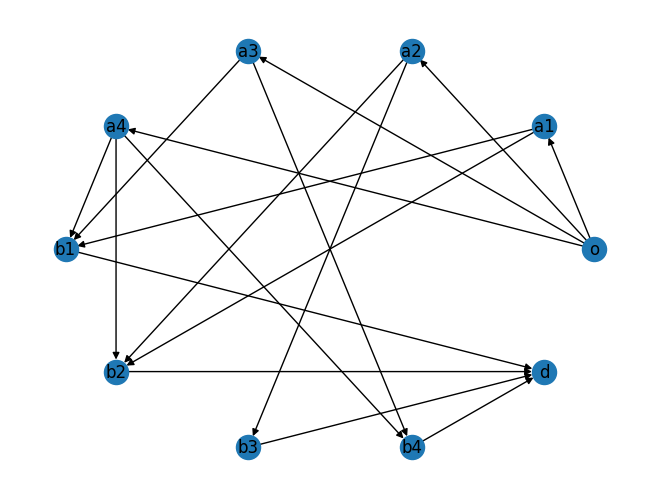

In [14]:
nx.draw_circular(G_a, with_labels=True)

"By constructing this network, the goal is to show that there is a maximum flow from $o$ to $d$ of value $\left| V_{0} \right|$; if this flow exists, it implies that each node in $V_{0}$ can be matched to a distinct node in $V_{1}$, satisfying Hall's condition for a perfect matching"

Let us apply Ford and Fulkerson's algorithm over $G_{a}$ using the library `NetworkX`, in particular the function `nx.maximum_flow`

In [15]:
flow_value_a, flow_dict_a = nx.maximum_flow(G_a, "o", "d")

In [16]:
flow_dict_a

{'o': {'a1': 1, 'a2': 1, 'a3': 1, 'a4': 1},
 'a1': {'b1': 0, 'b2': 1},
 'a2': {'b2': 0, 'b3': 1},
 'a3': {'b1': 1, 'b4': 0},
 'a4': {'b1': 0, 'b2': 0, 'b4': 1},
 'b1': {'d': 1},
 'b2': {'d': 1},
 'b3': {'d': 1},
 'b4': {'d': 1},
 'd': {}}

In [17]:
F = [(i, j) for i in flow_dict_a for j in flow_dict_a[i] if flow_dict_a[i][j] == 1 and i != 'o' and j != 'd']
F

[('a1', 'b2'), ('a2', 'b3'), ('a3', 'b1'), ('a4', 'b4')]

And we get the following result

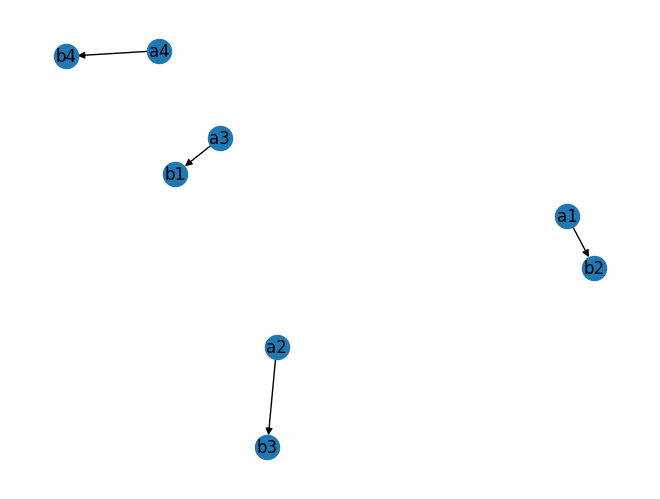

In [18]:
nx.draw(nx.DiGraph(F), with_labels = True)

## Point b
Now, assume that there are multiple portions of every food, and the distribution of the portions is $\begin{pmatrix}
2 & 3 & 2 & 2 \\
\end{pmatrix}$. Each person can take an arbitrary number of *different* foods. Exploit the analogy with max-flow problems to establish how many portions of food can be assign in total.

In [ ]:
V2_bar = ['o'] + [f'a{i}' for i in range(1, 4 + 1)] + [f'b{i}_in' for i in range(1, 4 + 1)] + [f'b{i}_out' for i in range(1, 4 + 1)] + ['d']
V2_bar

['o',
 'a1',
 'a2',
 'a3',
 'a4',
 'b1_in',
 'b2_in',
 'b3_in',
 'b4_in',
 'b1_out',
 'b2_out',
 'b3_out',
 'b4_out',
 'd']

In [ ]:
E2_bar = []
for e in E_bar:
    if 'b' in e[1]:
        E2_bar.append((e[0], e[1] + '_in'))
    elif 'b' in e[0]:
        E2_bar.append((e[0] + '_out', e[1]))
    else:
        E2_bar.append(e)
E2_bar += [(f'b{i}_in', f'b{i}_out') for i in range(1, 4 + 1)]
E2_bar

[('o', 'a1'),
 ('o', 'a2'),
 ('o', 'a3'),
 ('o', 'a4'),
 ('a1', 'b1_in'),
 ('a1', 'b2_in'),
 ('a2', 'b2_in'),
 ('a2', 'b3_in'),
 ('a3', 'b1_in'),
 ('a3', 'b4_in'),
 ('a4', 'b1_in'),
 ('a4', 'b2_in'),
 ('a4', 'b4_in'),
 ('b1_out', 'd'),
 ('b2_out', 'd'),
 ('b3_out', 'd'),
 ('b4_out', 'd'),
 ('b1_in', 'b1_out'),
 ('b2_in', 'b2_out'),
 ('b3_in', 'b3_out'),
 ('b4_in', 'b4_out')]

In [ ]:
n_nodes_G2_bar = 1 + cardinality_V0 + cardinality_V1 + cardinality_V1 + 1
n_nodes_G2_bar

14

In [ ]:
capacities = {
    ('b1_in', 'b1_out'): 2,
     ('b2_in', 'b2_out'): 3,
      ('b3_in', 'b3_out'): 2,
       ('b4_in', 'b4_out'): 2
    }
capacities

{('b1_in', 'b1_out'): 2,
 ('b2_in', 'b2_out'): 3,
 ('b3_in', 'b3_out'): 2,
 ('b4_in', 'b4_out'): 2}

In [ ]:
G2_bar = nx.DiGraph()
W2_bar = np.zeros(((n_nodes_G2_bar,)*2))

for e in E2_bar:
    if 'b' in e[0] and 'b' in e[1]:
        G2_bar.add_edge(e[0], e[1], capacity=capacities[e])
        W2_bar[V2_bar.index(e[0])][V2_bar.index(e[1])] = capacities[e]
    elif 'a' in e[0]:
        G2_bar.add_edge(e[0], e[1], capacity=1)
        W2_bar[V2_bar.index(e[0])][V2_bar.index(e[1])] = 1
    else:
        G2_bar.add_edge(e[0], e[1])
        W2_bar[V2_bar.index(e[0])][V2_bar.index(e[1])] = np.inf
W2_bar

array([[ 0., inf, inf, inf, inf,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
         0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,
         0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,
         0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,
         0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        inf],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        inf],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 

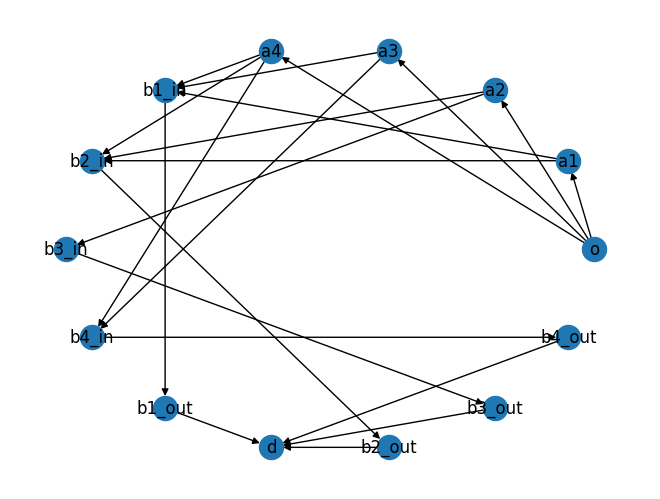

In [ ]:
nx.draw_circular(G2_bar, with_labels=True)

In [ ]:
flow2_value, flow2_dict = nx.maximum_flow(G2_bar, "o", "d")
flow2_value, flow2_dict

(8,
 {'o': {'a1': 1, 'a2': 2, 'a3': 2, 'a4': 3},
  'a1': {'b1_in': 0, 'b2_in': 1},
  'a2': {'b2_in': 1, 'b3_in': 1},
  'a3': {'b1_in': 1, 'b4_in': 1},
  'a4': {'b1_in': 1, 'b2_in': 1, 'b4_in': 1},
  'b1_in': {'b1_out': 2},
  'b2_in': {'b2_out': 3},
  'b3_in': {'b3_out': 1},
  'b4_in': {'b4_out': 2},
  'b1_out': {'d': 2},
  'd': {},
  'b2_out': {'d': 3},
  'b3_out': {'d': 1},
  'b4_out': {'d': 2}})

In [ ]:
nx.draw_networkx_edge_labels(G_bar, pos=nx.spring_layout(G_bar))

TypeError: draw_networkx_edge_labels() missing 1 required positional argument: 'pos'